In [39]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import os
import scipy.sparse

In [41]:
from proj1_helpers import *
DATA_TRAIN_PATH = os.path.join( os.getcwd(), "..", "data", "train.csv")

y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
N_FEATURES=tX.shape[1]
N_SAMPLES=tX.shape[0]
print( "loaded training data: %d samples and %d features\n"%(N_SAMPLES, N_FEATURES) )

loaded training data: 250000 samples and 30 features



In [42]:
y_colors = np.array(['b']*N_SAMPLES)
y_colors[y==-1] = 'r'
y += 1.
y *= 0.5
y_vals = np.unique(y)
print(y_vals)
# If I understood correctly, 1 are bosons, i.e. boson events will be colored in blue

[ 0.  1.]


In [43]:
feature_names=('DER_mass_MMC' , 'DER_mass_transverse_met_lep' , 'DER_mass_vis' , 'DER_pt_h' , 'DER_deltaeta_jet_jet' , 'DER_mass_jet_jet' , 'DER_prodeta_jet_jet' , 'DER_deltar_tau_lep' , 'DER_pt_tot' , 'DER_sum_pt' , 'DER_pt_ratio_lep_tau' , 'DER_met_phi_centrality' , 'DER_lep_eta_centrality' , 'PRI_tau_pt' , 'PRI_tau_eta' , 'PRI_tau_phi' , 'PRI_lep_pt' , 'PRI_lep_eta' , 'PRI_lep_phi' , 'PRI_met' , 'PRI_met_phi' , 'PRI_met_sumet' , 'PRI_jet_num' , 'PRI_jet_leading_pt' , 'PRI_jet_leading_eta' , 'PRI_jet_leading_phi' , 'PRI_jet_subleading_pt' , 'PRI_jet_subleading_eta' , 'PRI_jet_subleading_phi' , 'PRI_jet_all_pt')

## Plot once

In [ ]:
n_cols_plots=5
n_rows_plots=int(N_FEATURES/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < tX.shape[1]:
            ax = axes[col]
            data_to_plot=tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

#### Plot a given feature for detailed inspection 

In [ ]:
feat_index_to_plot=4
f, axes = plt.subplots(1,1)
axes.scatter(range(N_SAMPLES), tX[:,feat_index_to_plot], c=y_colors, alpha=0.2)

## Remove NaNs

In [6]:
NaN_indices =  np.where( tX < -900.0 )[0] 
NaN_indices = np.unique(NaN_indices)
print(len(NaN_indices))

181886


In [7]:
print(tX.shape)
tX = np.delete(tX, NaN_indices, axis=0)
y = np.delete(y, NaN_indices, axis=0)
print(tX.shape)

(250000, 30)
(68114, 30)


In [8]:
y_colors = np.delete(y_colors, NaN_indices, axis=0)
N_SAMPLES=tX.shape[0]

## Replot all features

In [ ]:
n_cols_plots=5
n_rows_plots=int(N_FEATURES/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < tX.shape[1]:
            ax = axes[col]
            data_to_plot=tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

## Treat categorical feature

In [44]:
candidate_categorical_features = [22]
# make sure it is categorical
for candidate in candidate_categorical_features:
    print(np.unique(tX[:,candidate]))
    
# only select the features that are really categorical
categorical_features = candidate_categorical_features

[ 0.  1.  2.  3.]


In [45]:
# make a copy
categorical_feature_data = np.array([]).reshape((N_SAMPLES,0))
for cat_feat in categorical_features:
    categorical_feature_data = np.c_[categorical_feature_data, tX[:,cat_feat]]
print(categorical_feature_data.shape)

(250000, 1)


In [46]:
# Remove it from the list of features (temporarily)
for cat_feat in categorical_features:
    tX = np.delete(tX, cat_feat, axis=1)
print(tX.shape)

(250000, 29)


In [47]:
def create_dummy_variables(categorical_dataset):
    """takes a single categorical feature and returns the corresponding matrix of dummy variables (of size n_levels - 1)"""
    levels = np.unique(categorical_dataset)
    num_levels = levels.shape[0]
    levels = np.delete(levels, -1, axis=0)
    num_samples = categorical_dataset.shape[0]
    dummy_features = np.array([]).reshape(num_samples,0)
    for level in levels:
        dummy_tmp = (categorical_dataset == level)
        dummy_tmp = np.array( [int(x) for x in dummy_tmp] )
        dummy_features = np.c_[dummy_features, dummy_tmp ]
    return dummy_features

In [13]:
# Test this out
dummy = create_dummy_variables(categorical_feature_data[:,0])
print(dummy)

[[ 1.]
 [ 0.]
 [ 1.]
 ..., 
 [ 1.]
 [ 0.]
 [ 1.]]


## Add categorical data to dataset

In [50]:
train_tX = tX
print("creating dummy data for {d} categorical variables".format(d=categorical_feature_data.shape[1]))
print(train_tX.shape)

creating dummy data for 1 categorical variables
(250000, 29)


In [51]:
for index in range(categorical_feature_data.shape[1]):
    train_tX = np.c_[train_tX, create_dummy_variables(categorical_feature_data[:,index])]
print(train_tX.shape)

(250000, 32)



## Primitive Features

In [ ]:
primitive_features_indices=[index for index,name in enumerate(feature_names) if name[0:3]=='PRI']
N_PRI_FEAT=len(primitive_features_indices)
print("detected %d primitive features"%(N_PRI_FEAT))
#print(primitive_features_indices)
#for index in primitive_features_indices:
#    print(feature_names[index])

In [ ]:
PRI_tX = []
for index in primitive_features_indices:
    PRI_tX.append(tX[:,index])
PRI_tX = np.array(PRI_tX).T.reshape( (N_SAMPLES,N_PRI_FEAT) )
#print(PRI_tX.shape)
#print(tX[0:3,primitive_features_indices[0]])
#print(tX[0:3,primitive_features_indices[1]])
#print(PRI_tX[0:3,:])

In [ ]:
n_cols_plots=4
n_rows_plots=int(N_PRI_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < PRI_tX.shape[1]:
            ax = axes[col]
            data_to_plot=PRI_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

## Derived features

In [ ]:
der_features_indices=[index for index,name in enumerate(feature_names) if name[0:3]=='DER']
N_DER_FEAT=len(der_features_indices)
print("detected %d primitive features"%(N_DER_FEAT))
#print(primitive_features_indices)
#for index in primitive_features_indices:
#    print(feature_names[index])

In [ ]:
DER_tX = []
for index in der_features_indices:
    DER_tX.append(tX[:,index])
DER_tX = np.array(DER_tX).T.reshape( (N_SAMPLES,N_DER_FEAT) )
#DERnt(DER_tX.shape)
#DERnt(tX[0:3,DERmitive_features_indices[0]])
#DERnt(tX[0:3,DERmitive_features_indices[1]])
#DERnt(DER_tX[0:3,:])

In [ ]:
n_cols_plots=4
n_rows_plots=int(N_DER_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < DER_tX.shape[1]:
            ax = axes[col]
            data_to_plot=DER_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

## Whiten Data

In [52]:
to_whiten = train_tX
U, s, Vt = np.linalg.svd(to_whiten, full_matrices=False)
print(U.shape)
print(s.shape)
print(Vt.shape)
N_WHIT_FEAT=s.shape[0]

(250000, 32)
(32,)
(32, 32)


In [53]:
whit_tX = U.dot(Vt)

### Replot

In [ ]:
n_cols_plots=4
n_rows_plots=int(N_WHIT_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < whit_tX.shape[1]:
            ax = axes[col]
            data_to_plot=whit_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

## Logistic Regression

In [54]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1/(1+np.exp(-t))

In [55]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    Xw = tx.dot(w)
#    print(Xw.shape)
#    print(y.shape)
    LOG_part = np.log( 1 + np.exp( Xw ) )
#    print(LOG_part.shape)
    PROD_part = np.multiply(y.reshape(N_SAMPLES,1), Xw )
#    print(PROD_part.shape)
    a = LOG_part - PROD_part
    return np.sum( a )

In [56]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T.dot( sigmoid(tx.dot(w)) - y.reshape((tx.shape[0],1)) )


## Gradient Descent

In [ ]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """

    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y,tx, w)
    w -= gamma*grad
    
    return loss, w

In [ ]:
from helpers import de_standardize
from plots import visualization

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.001
    losses = []

    # build tx
    tx = np.c_[.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return losses, w

In [ ]:
losses, w_star = logistic_regression_gradient_descent_demo(y, whit_tX)
#print(w_star.shape)
#print(w_star)

In [ ]:
f = plt.figure()
ax=f.add_subplot(2,1,1)
ax.scatter(whit_tX[:,0],whit_tX[:,1], c=y_colors, alpha=0.1)

ax=f.add_subplot(2,1,2)
prediction = sigmoid(whit_tX[:,0:1].dot(w_star[1:2]))
prediction = prediction < 0.5
#ax.plot(prediction)
ax.scatter(whit_tX[:,0],whit_tX[:,1], c=prediction, alpha=0.1)



In [ ]:
error = np.sum(np.abs(prediction - y.reshape(N_SAMPLES,1)))
print(error)
print(error/N_SAMPLES)

## Newton's Method

In [57]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    S1 = sigmoid(tx.dot(w))
    S1 = S1.reshape((N_SAMPLES,1))
#    print(S1.shape)
    S2 = 1.0 - sigmoid(tx.dot(w))
#    print(S2.shape)
    S = np.multiply(S1,S2)
#    print(S.shape)
    S = scipy.sparse.spdiags(S[:,0], 0, N_SAMPLES, N_SAMPLES)
    return tx.T.dot(S.dot(tx))

In [58]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y,tx, w)
    hess = calculate_hessian(y, tx, w)
    return loss, grad, hess

In [59]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, grad, hess = logistic_regression(y,tx,w)
    w -= gamma * np.linalg.inv(hess).dot(grad);
    return loss, w

In [60]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 1000
    gamma = 0.25
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 5 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2])/np.abs(losses[-1]) < threshold:
            print("[Exit Condition Met]: Current iteration={i}, the loss={l}".format(i=iter, l=loss)) 
            break
    return losses, w

In [65]:
losses, w_star = logistic_regression_newton_method_demo(y, tX)

Current iteration=0, the loss=173286.79513998624
Current iteration=5, the loss=130395.26459199007
Current iteration=10, the loss=124924.71986508014
Current iteration=15, the loss=124381.26455609204
Current iteration=20, the loss=124343.30326785737
Current iteration=25, the loss=124341.03197649636
Current iteration=30, the loss=124340.9021284504
[Exit Condition Met]: Current iteration=33, the loss=124340.89573647684


## Compute Predictions

In [67]:
tX_pred = np.c_[np.ones((y.shape[0], 1)), tX]
prediction = sigmoid(tX_pred.dot(w_star))
prediction = np.array( [ int(x) for x in (prediction > 0.5)] )

## Plot predictions

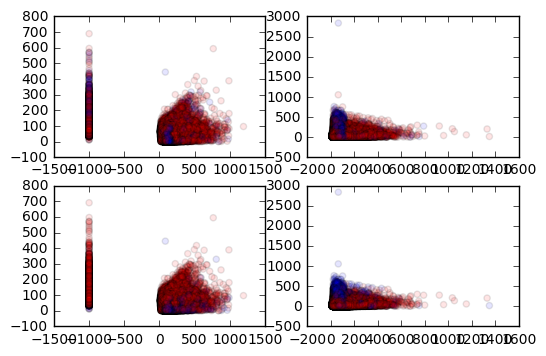

In [63]:
f = plt.figure()
ax=f.add_subplot(2,2,1)
ax.scatter(tX[:,0],tX[:,1], c=y_colors, alpha=0.1)

ax=f.add_subplot(2,2,2)
ax.scatter(tX[:,2],tX[:,3], c=y_colors, alpha=0.1)

prediction_colors = np.array(['b']*N_SAMPLES)
prediction_colors[prediction==0] = 'r'

ax=f.add_subplot(2,2,3)
ax.scatter(tX[:,0],tX[:,1], c=prediction_colors, alpha=0.1)

ax=f.add_subplot(2,2,4)
ax.scatter(tX[:,2],tX[:,3], c=prediction_colors, alpha=0.1)

## Compute training error

In [68]:
error = np.sum(np.abs(prediction - y))
print(prediction)
print(y)
print(error)
print(error/N_SAMPLES)

[0 1 0 ..., 0 1 0]
[ 1.  0.  0. ...,  1.  0.  0.]
62252.0
0.249008
